<a href="https://colab.research.google.com/github/UC44/simple-js-app/blob/main/Final_Report_Analysis_of_Samsung_Stock_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing Values:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Data Types:
Open           int64
High           int64
Low            int64
Close          int64
Adj Close    float64
Volume         int64
dtype: object

Summary Statistics:
               Open          High           Low         Close     Adj Close  \
count   6127.000000   6127.000000   6127.000000   6127.000000   6127.000000   
mean   28370.058756  28644.142321  28084.267994  28360.006528  24504.066850   
std    22589.409269  22764.800972  22394.681276  22567.361619  22041.302899   
min     2540.000000   2760.000000   2420.000000   2730.000000   1988.168701   
25%    10700.000000  10900.000000  10560.000000  10720.000000   7901.645264   
50%    21020.000000  21420.000000  20740.000000  21060.000000  16245.702150   
75%    45590.000000  46100.000000  45170.000000  45590.000000  39041.779295   
max    90300.000000  96800.000000  89500.000000  91000.000000  85300.000000

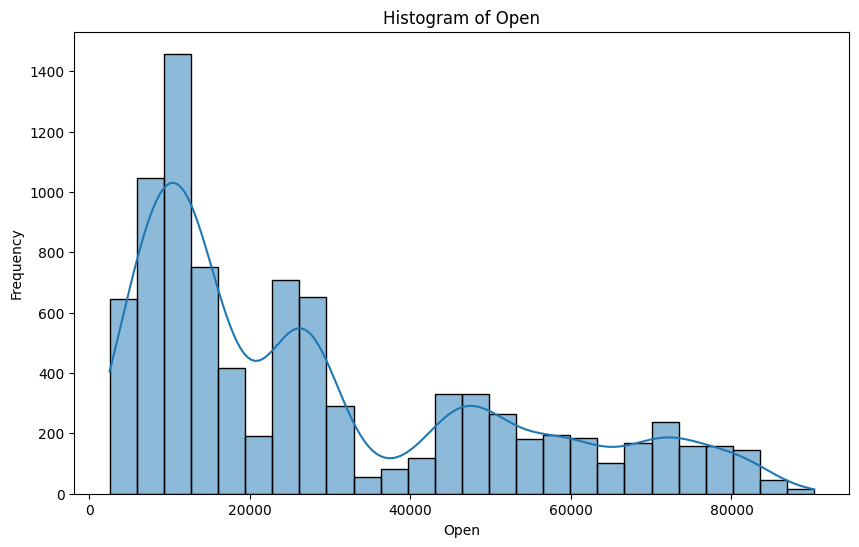

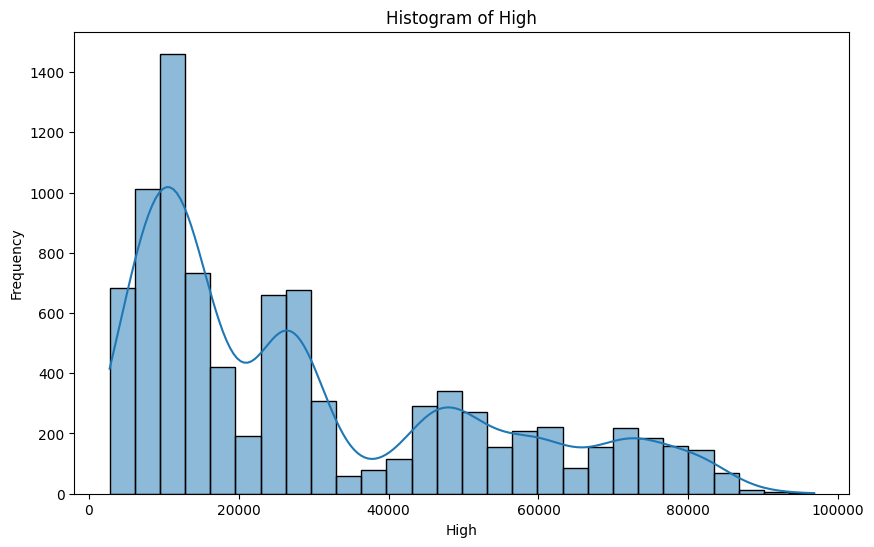

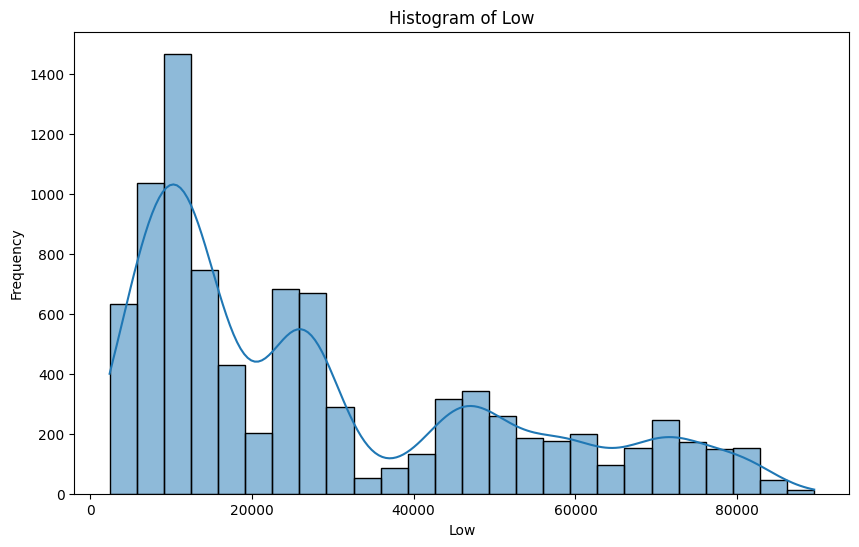

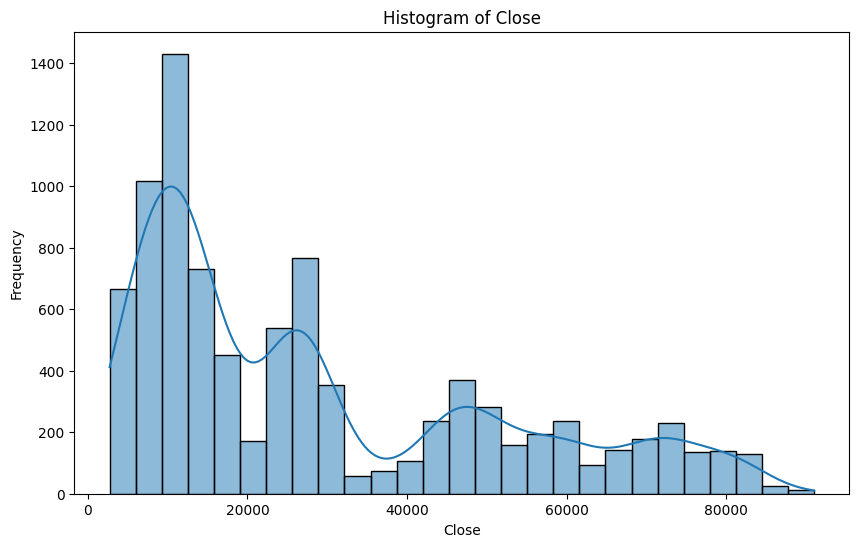

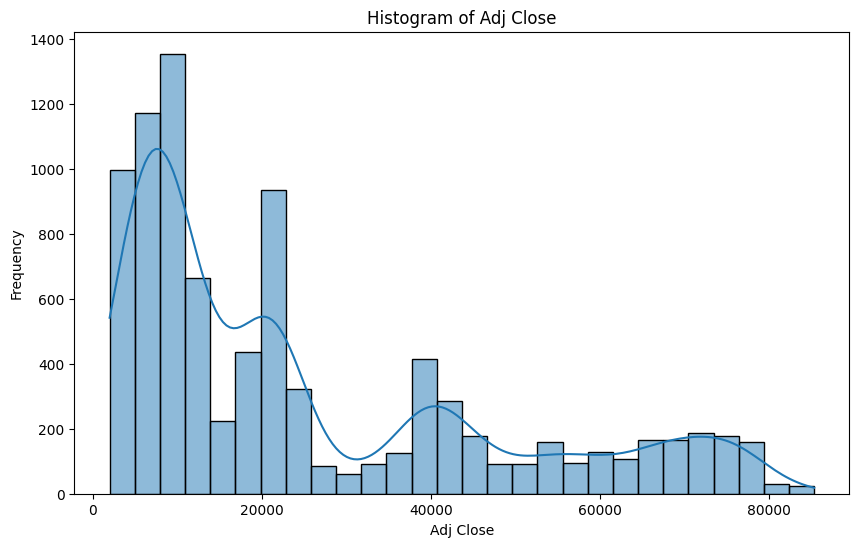

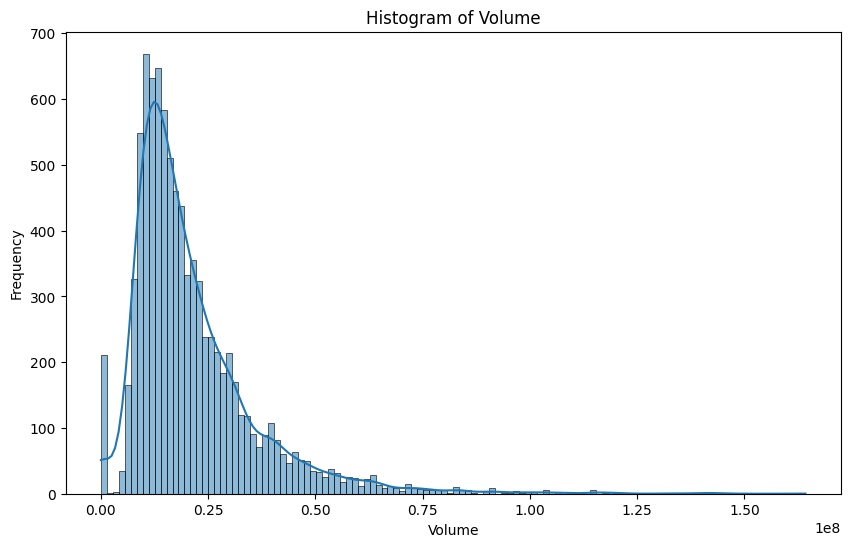

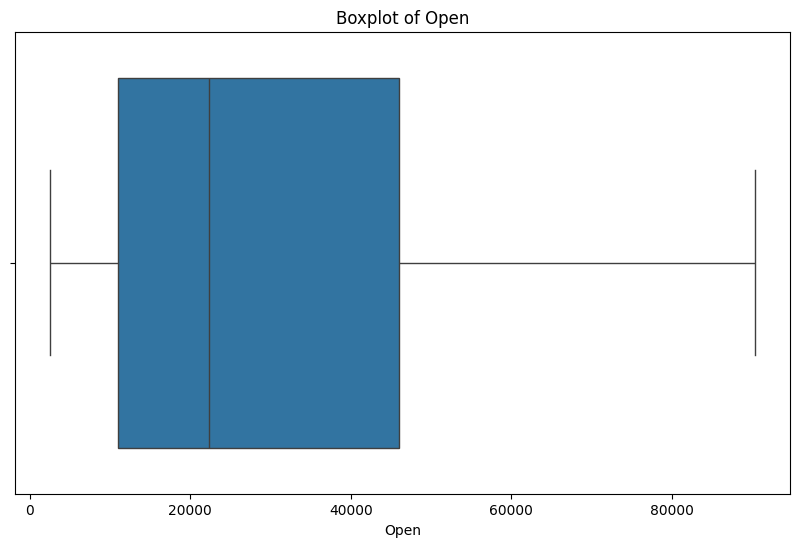

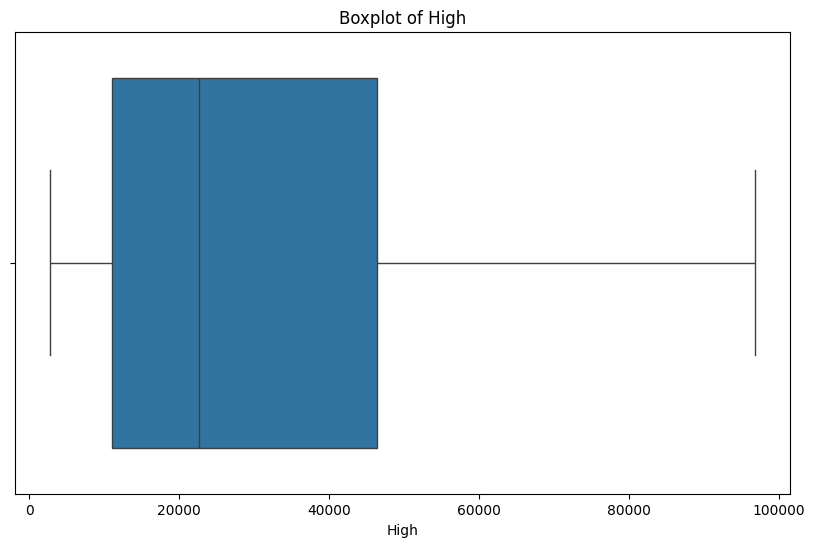

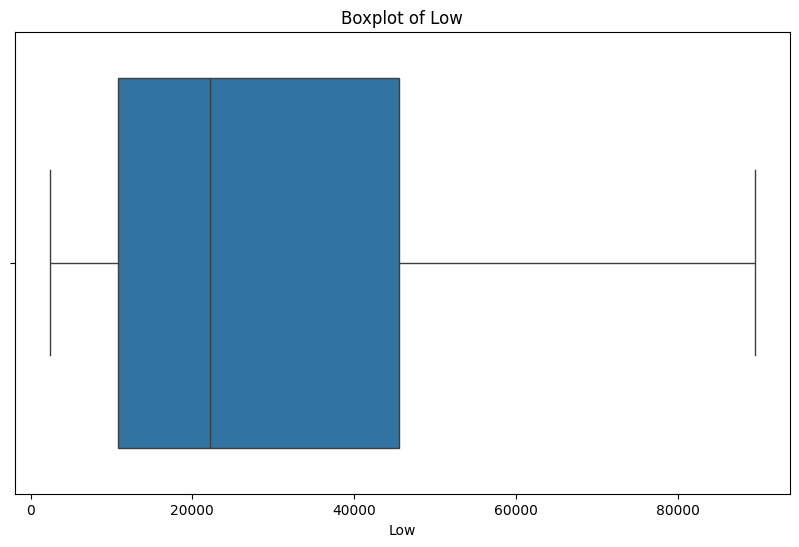

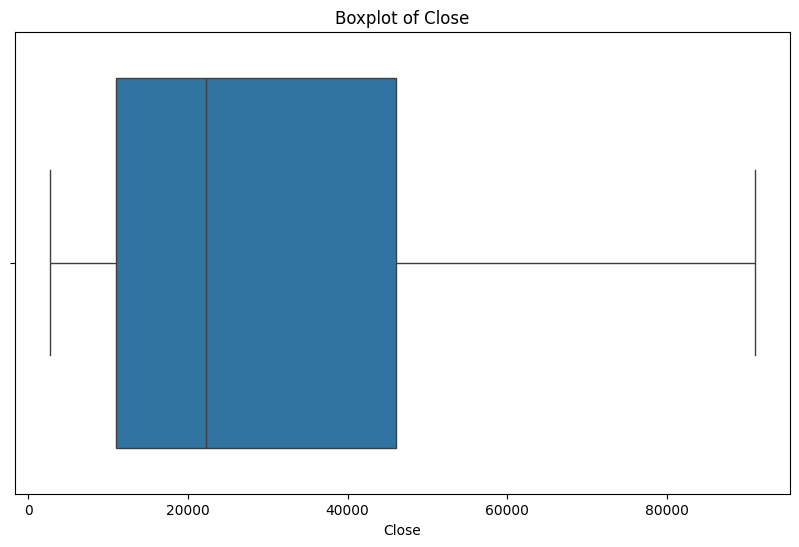

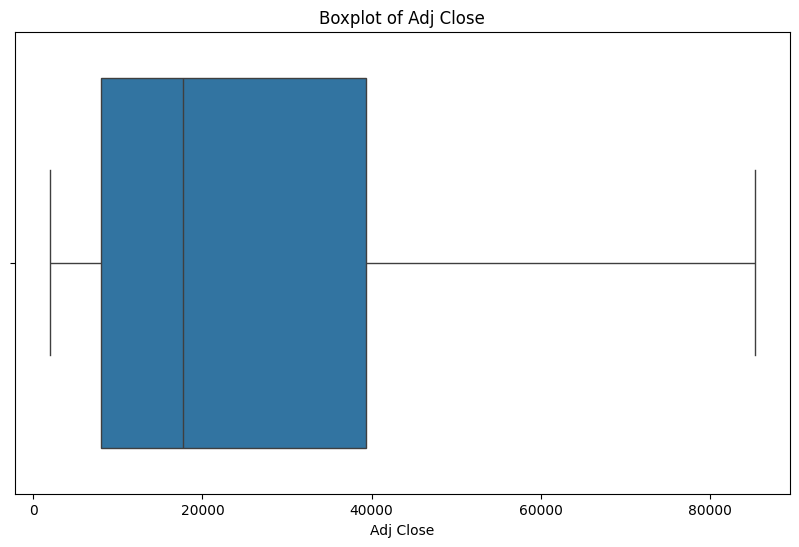

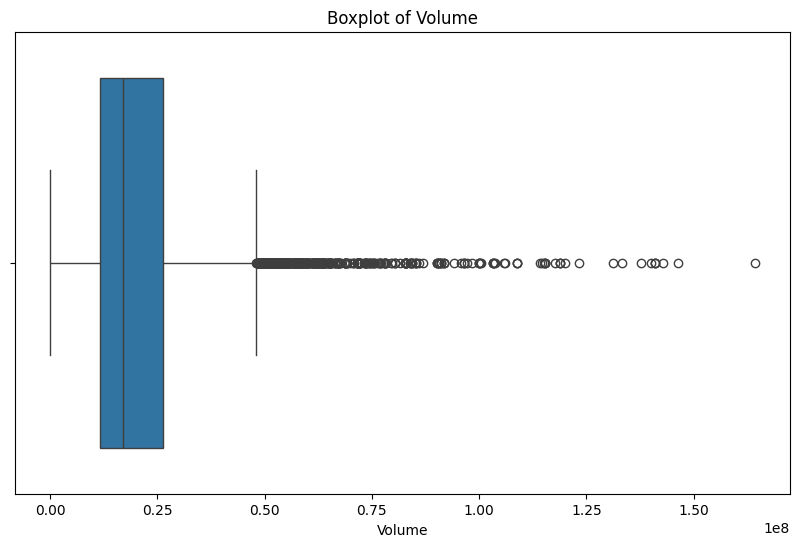

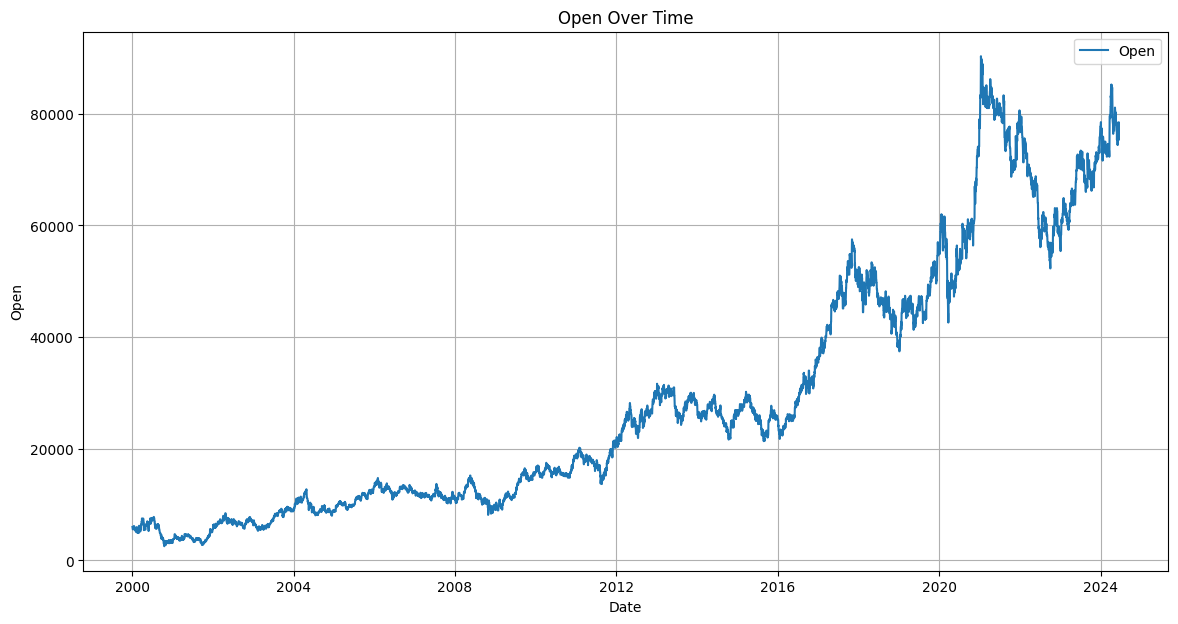

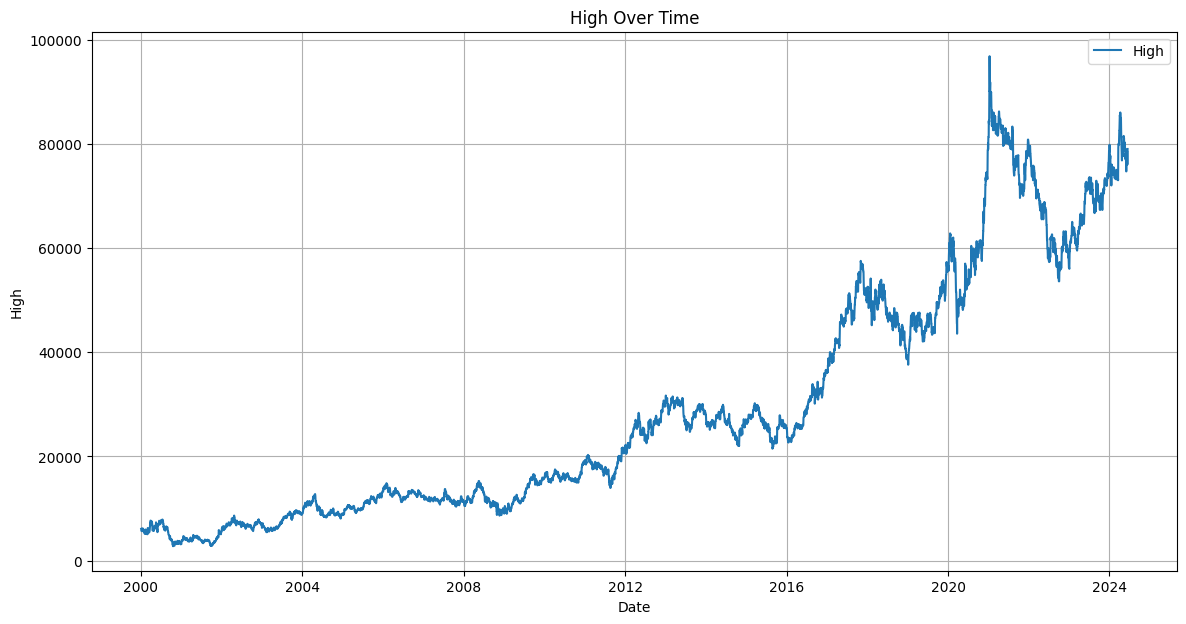

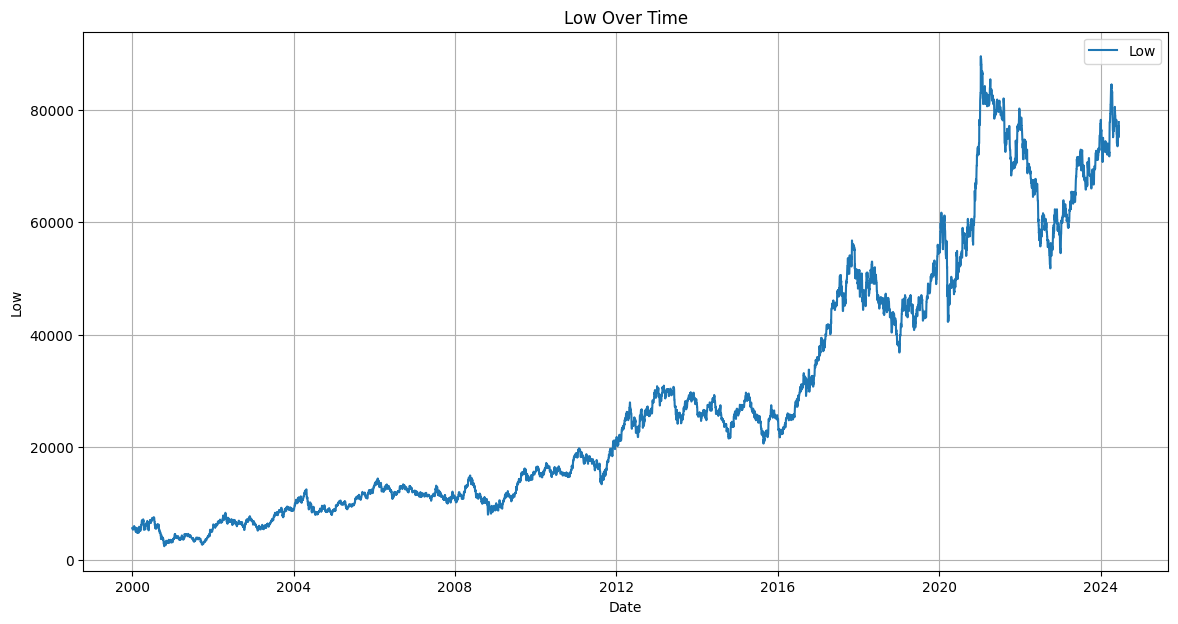

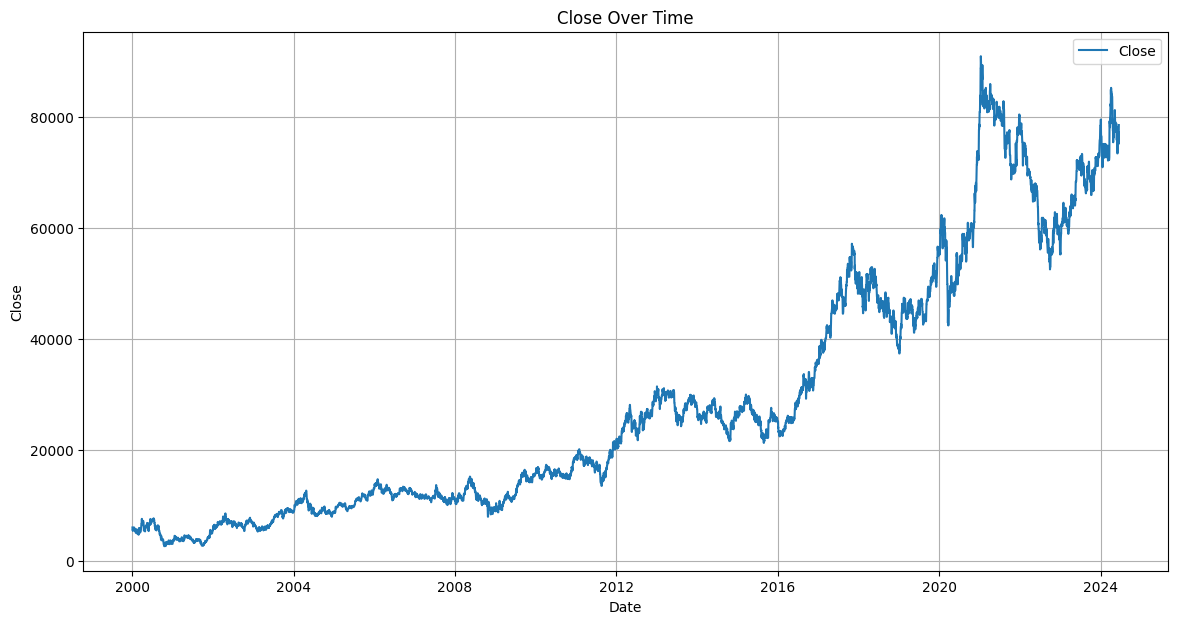

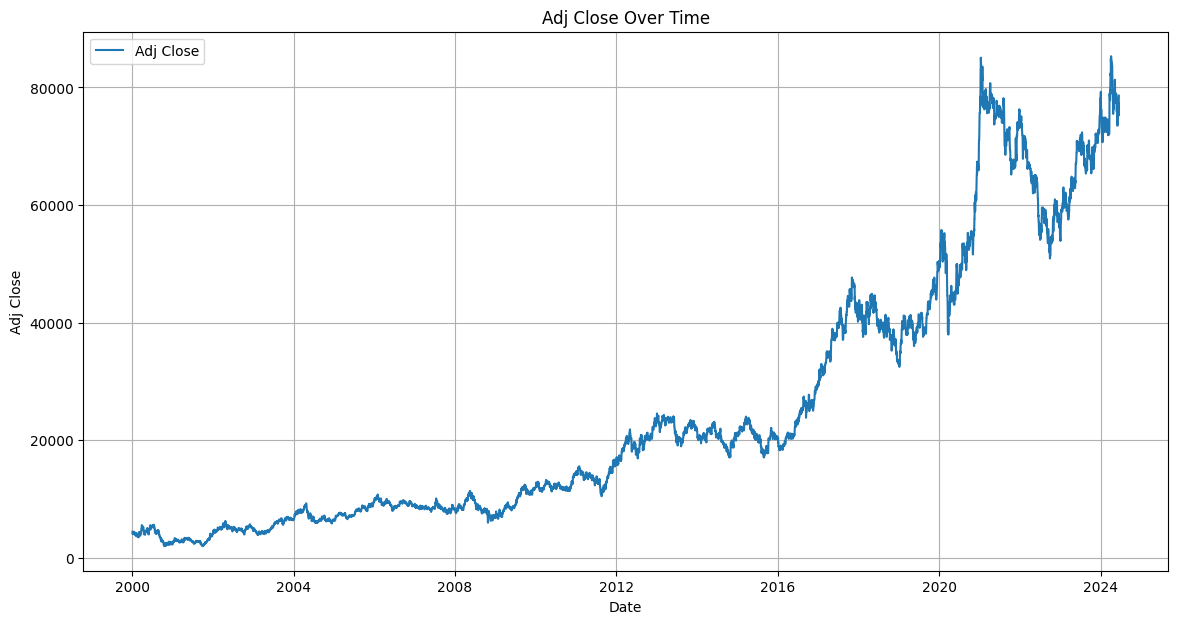

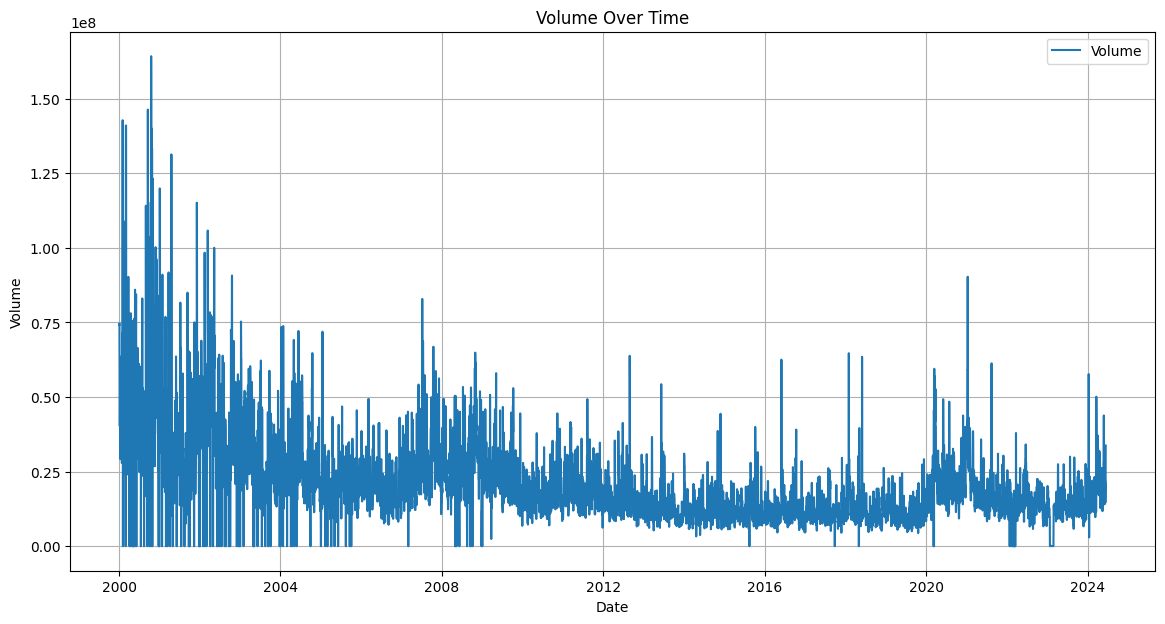


Correlation Matrix:
               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999876  0.999914  0.999767   0.996231 -0.373957
High       0.999876  1.000000  0.999873  0.999907   0.996279 -0.371298
Low        0.999914  0.999873  1.000000  0.999890   0.996363 -0.375950
Close      0.999767  0.999907  0.999890  1.000000   0.996384 -0.373752
Adj Close  0.996231  0.996279  0.996363  0.996384   1.000000 -0.344966
Volume    -0.373957 -0.371298 -0.375950 -0.373752  -0.344966  1.000000


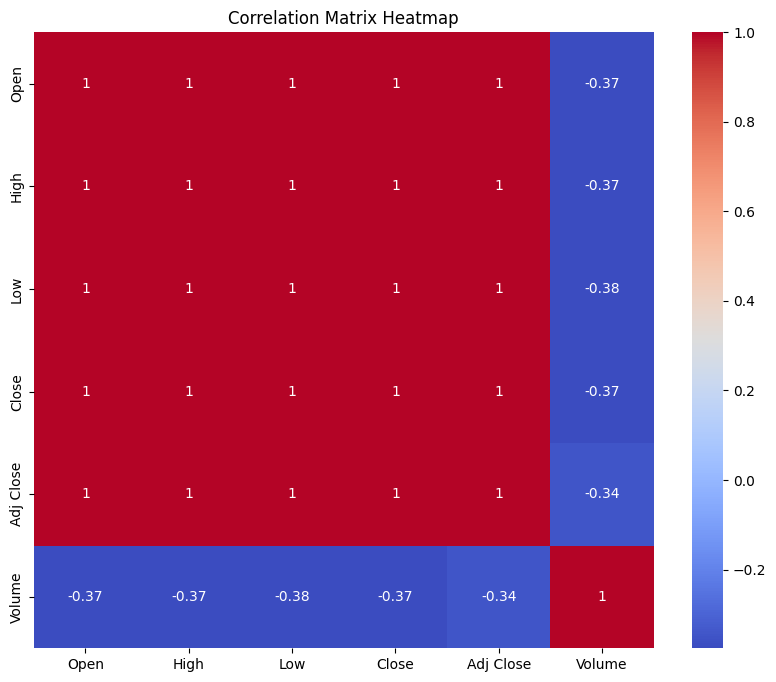

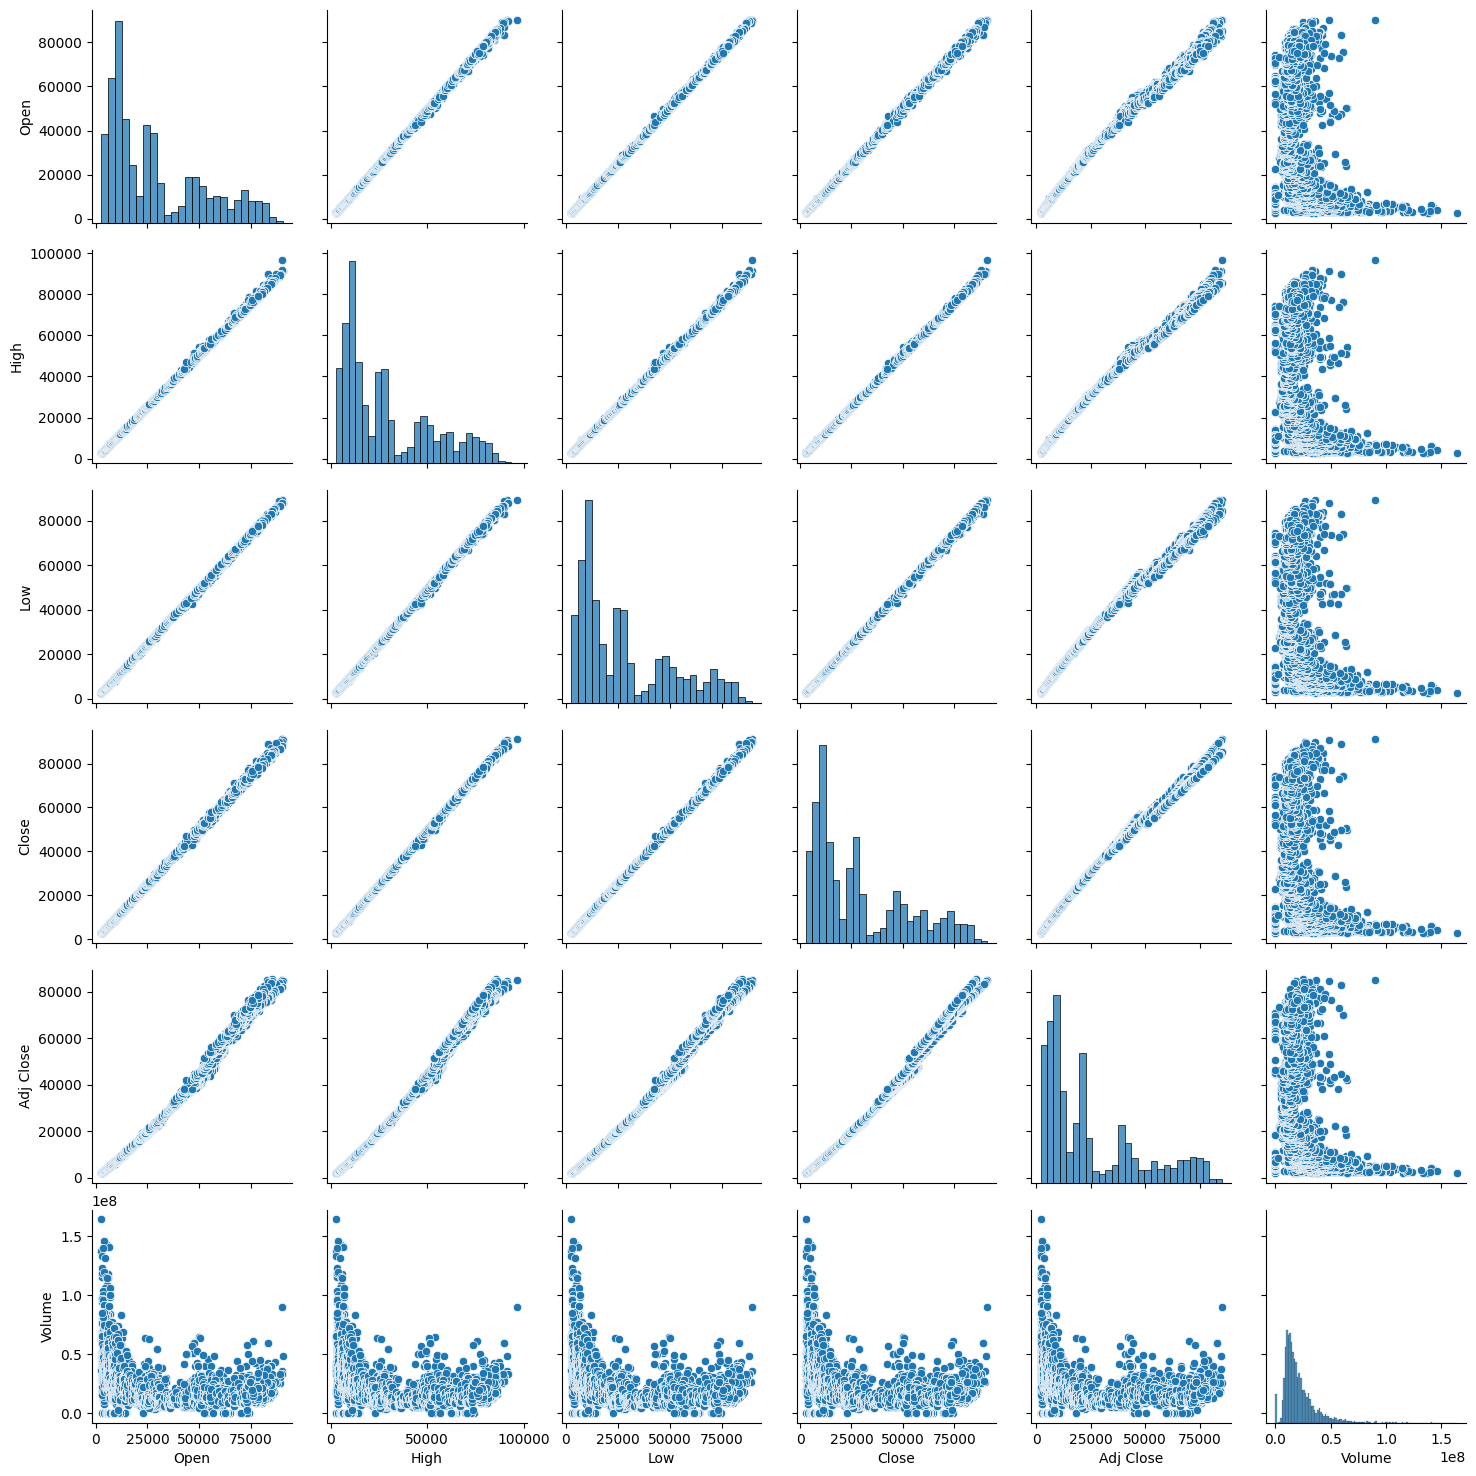


T-Test Results:
{'t-statistic': 0.027441553691868632, 'p-value': 0.9781078623627499}

Regression Analysis Results:
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     1449.
Date:                Thu, 27 Feb 2025   Prob (F-statistic):          5.22e-294
Time:                        17:10:39   Log-Likelihood:            -1.0152e+05
No. Observations:                8928   AIC:                         2.030e+05
Df Residuals:                    8926   BIC:                         2.031e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

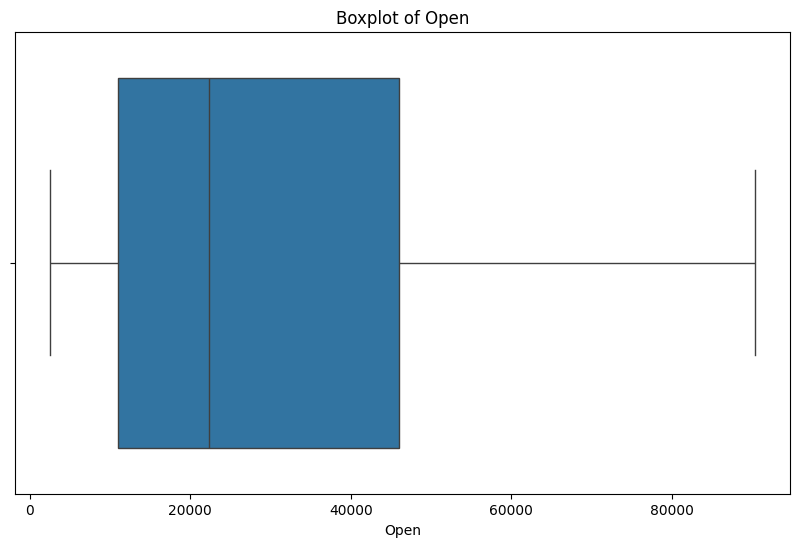

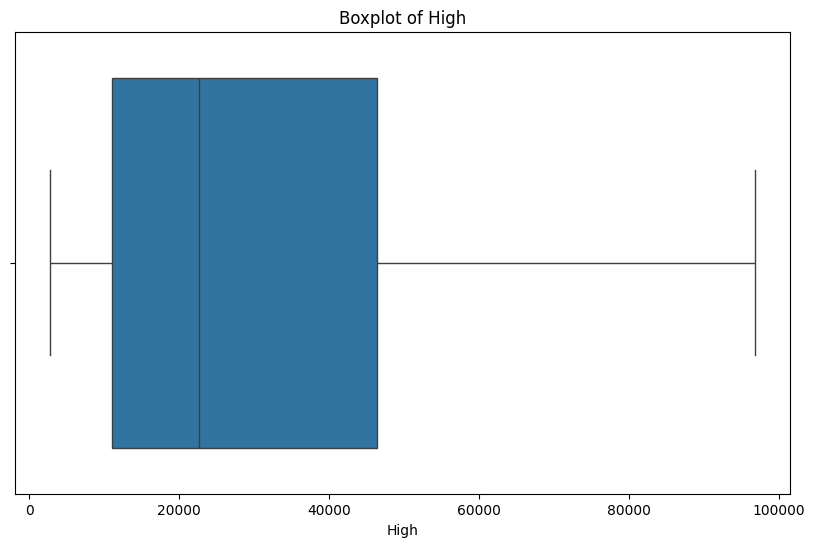

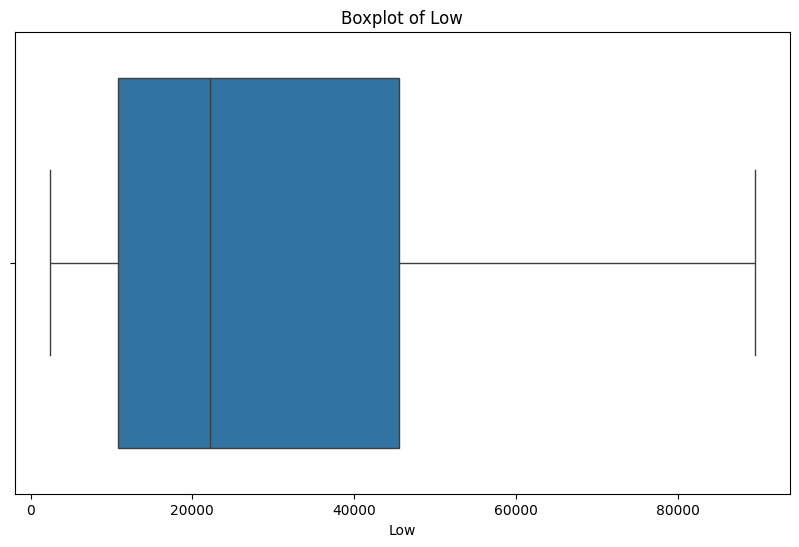

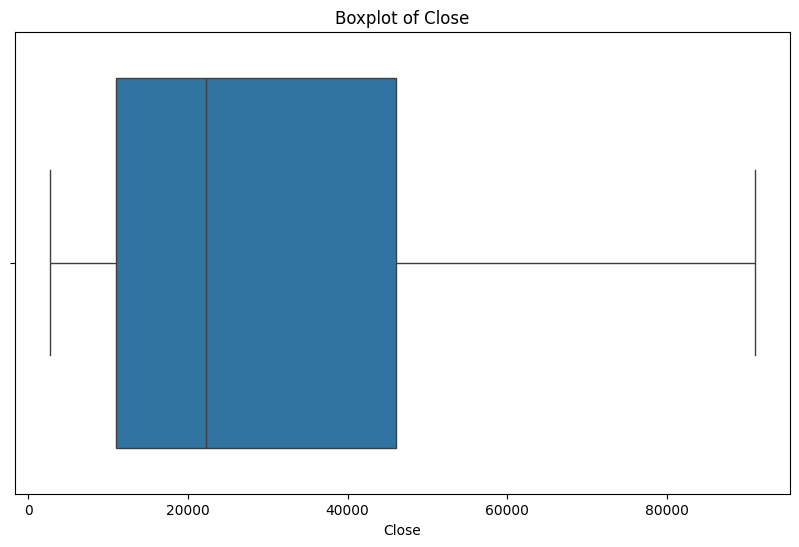

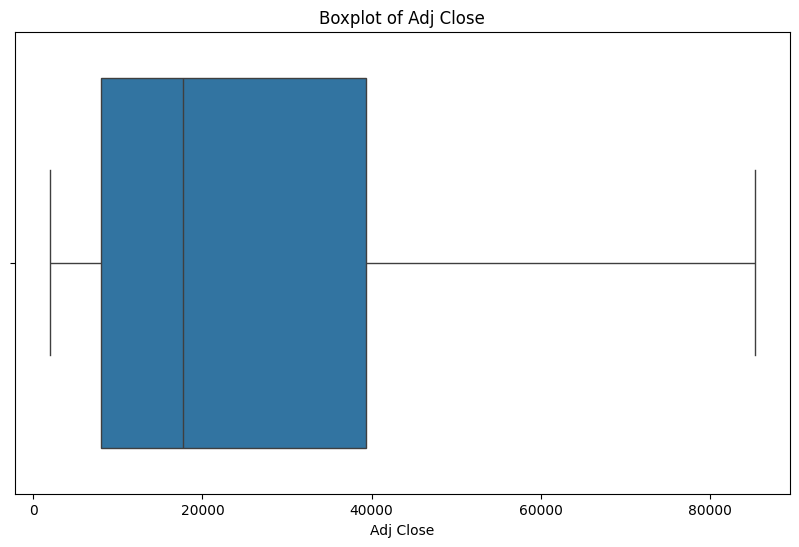

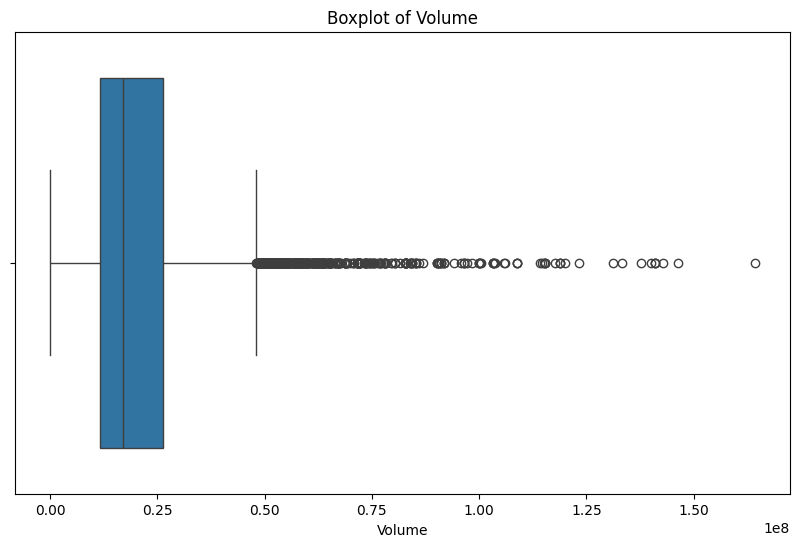

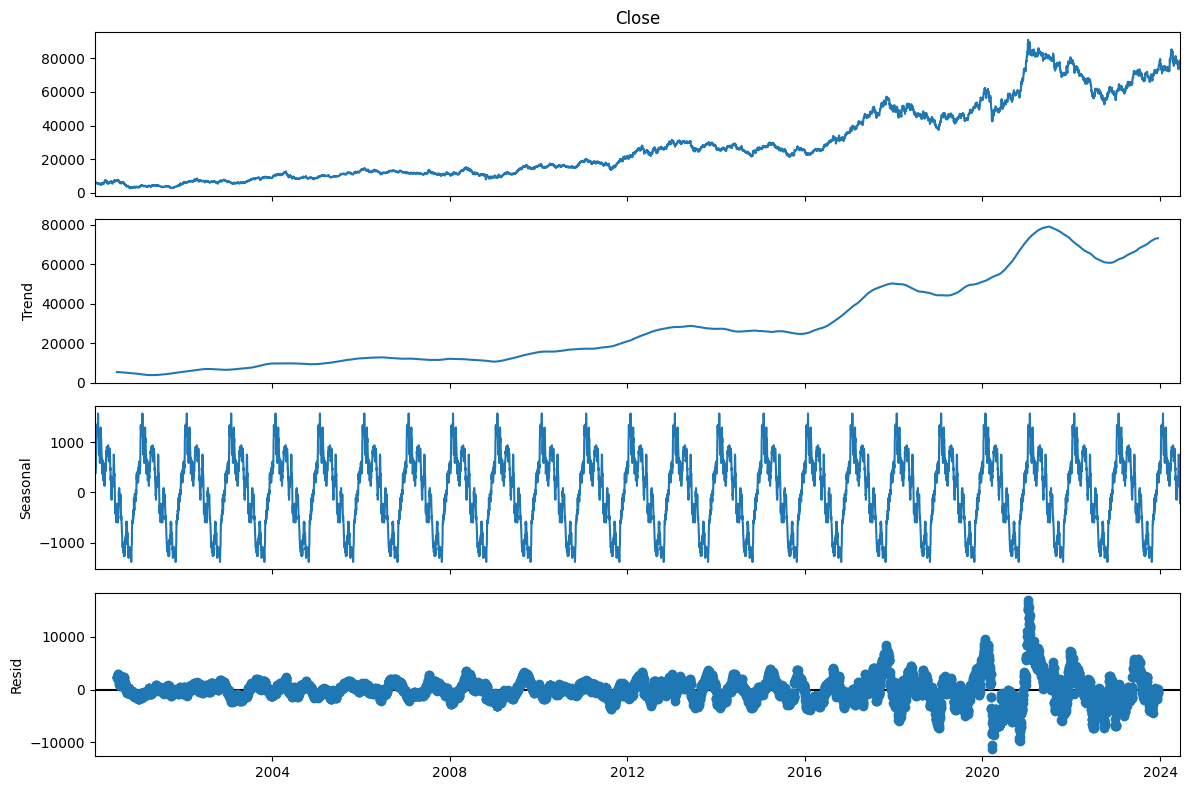

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 8928
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -67703.363
Date:                Thu, 27 Feb 2025   AIC                         135418.725
Time:                        17:10:45   BIC                         135461.306
Sample:                    01-04-2000   HQIC                        135433.220
                         - 06-13-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0044      0.006      0.761      0.447      -0.007       0.016
ar.L2         -0.0225      0.007     -3.160      0.002      -0.036      -0.009
ar.L3         -0.0039      0.007     -0.584      0.5

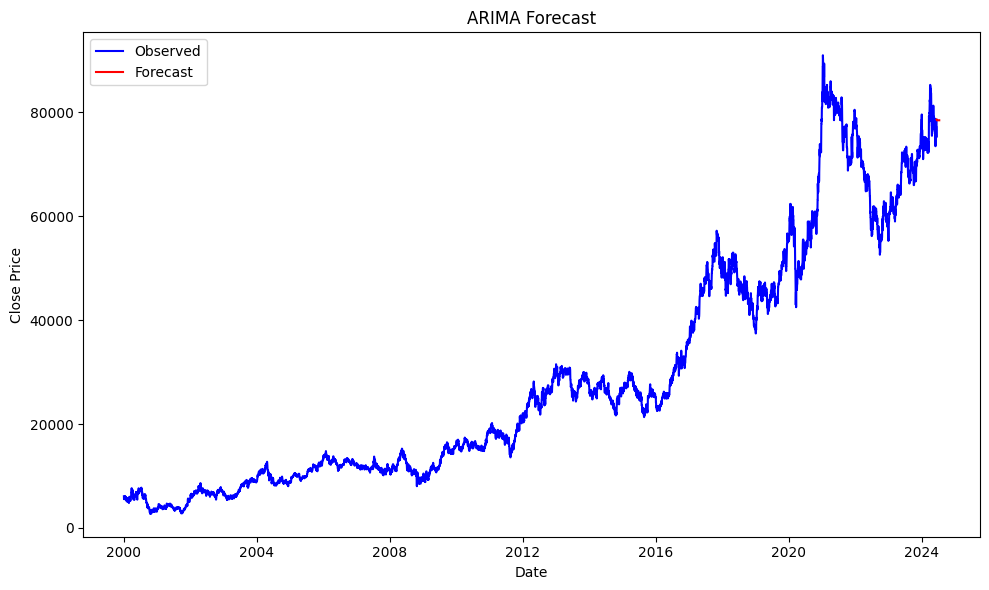

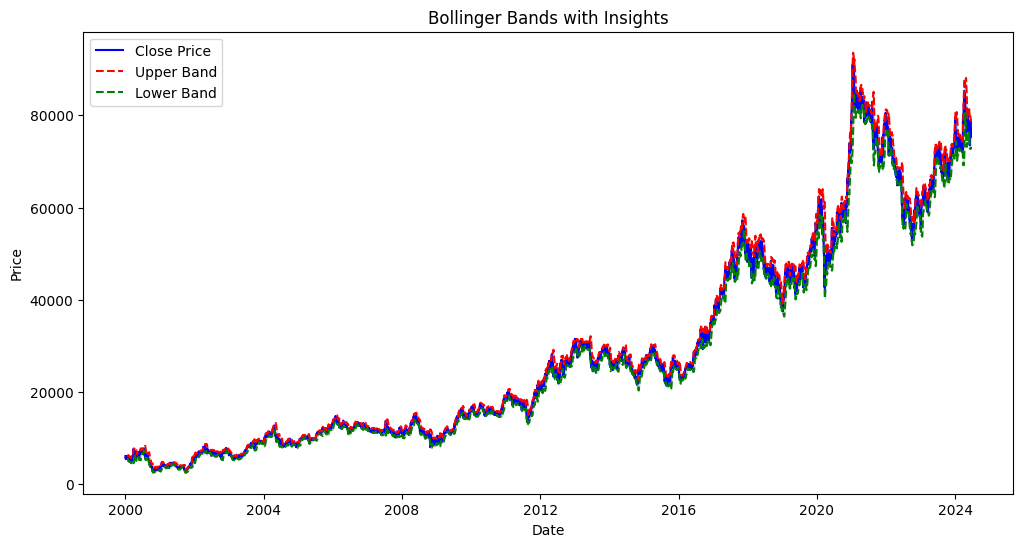

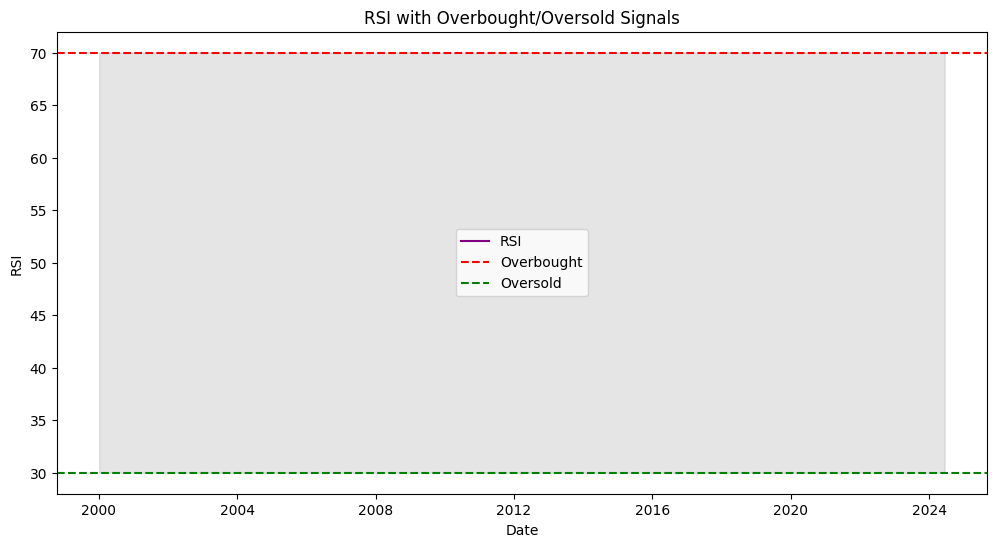

Integrated analysis complete.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  # Add this import statement
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = 'Samsung Dataset.csv'
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Check for missing values
missing_values = data.isnull().sum()
print('Missing Values:')
print(missing_values)

# Check data types
data_types = data.dtypes
print('\nData Types:')
print(data_types)

# Compute summary statistics
description = data.describe()
print('\nSummary Statistics:')
print(description)

# Resample the data to ensure a continuous time index (daily frequency)
# Use forward fill to handle missing values in one step
preprocessed_data = data.resample('D').mean().ffill()

# Display the first few rows of the preprocessed data
print('\nPreprocessed Data:')
print(preprocessed_data.head())

# Visualizations
def visualize_data(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

    # Generate histograms
    for col in numerical_cols:
        plt.figure(figsize=(10,6))
        sns.histplot(df[col], kde=True)
        plt.title('Histogram of ' + col)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

    # Generate boxplots
    for col in numerical_cols:
        plt.figure(figsize=(10,6))
        sns.boxplot(x=df[col])
        plt.title('Boxplot of ' + col)
        plt.xlabel(col)
        plt.show()

    # Generate line plots for time series
    for col in numerical_cols:
        plt.figure(figsize=(14,7))
        plt.plot(df.index, df[col], label=col)
        plt.title(col + ' Over Time')
        plt.xlabel('Date')
        plt.ylabel(col)
        plt.legend()
        plt.grid(True)
        plt.show()

visualize_data(preprocessed_data)

# Correlation Analysis
def compute_correlation(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

    # Compute the correlation matrix for numeric variables
    df_corr = df[numeric_cols].corr()
    print('\nCorrelation Matrix:')
    print(df_corr)

    # Plot a heatmap of the correlation matrix to visualize relationships
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix Heatmap')
    plt.show()

    # Generate scatter plots (pairplots) to investigate interactions between variables
    sns.pairplot(df[numeric_cols])
    plt.show()

compute_correlation(preprocessed_data)

# Statistical Tests
def run_statistical_tests(df, test_type, col1, col2=None):
    results = {}

    if test_type == 't-test':
        group1 = df[col1]
        group2 = df[col2]
        t_stat, p_value = ttest_ind(group1, group2, nan_policy='omit')
        results['t-statistic'] = t_stat
        results['p-value'] = p_value

    elif test_type == 'regression':
        formula = f"{col1} ~ {col2}"
        model = ols(formula, data=df).fit()
        results['summary'] = model.summary()

    else:
        raise ValueError("Invalid test_type. Choose 't-test' or 'regression'.")

    return results

# Example usage:
try:
    t_test_results = run_statistical_tests(preprocessed_data, 't-test', 'Open', 'Close')
    print('\nT-Test Results:')
    print(t_test_results)
except Exception as e:
    print(f"Error during t-test: {e}")

try:
    regression_results = run_statistical_tests(preprocessed_data, 'regression', 'Close', 'Volume')
    print('\nRegression Analysis Results:')
    print(regression_results['summary'])
except Exception as e:
    print(f"Error during regression analysis: {e}")

# Outlier Detection
def detect_outliers(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

    # Calculate Z-scores
    z_scores = np.abs(stats.zscore(df[numerical_cols]))  # Now 'stats' is defined

    # Define a threshold for identifying outliers
    threshold = 3

    # Identify outliers
    outliers = (z_scores > threshold).sum()
    print('\nNumber of outliers in each numerical column:')
    print(outliers)

    # Optionally, visualize outliers with boxplots
    for col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title('Boxplot of ' + col)
        plt.xlabel(col)
        plt.show()

detect_outliers(preprocessed_data)

# Time Series Decomposition
def decompose_time_series(df, column='Close'):
    decomposition = seasonal_decompose(df[column], model='additive', period=365)
    decomposition.plot().set_size_inches(12, 8)
    plt.tight_layout()
    plt.show()

decompose_time_series(preprocessed_data)

# ARIMA Forecasting
def arima_forecasting(df, column='Close'):
    model = ARIMA(df[column], order=(5, 1, 0))
    model_fit = model.fit()

    print(model_fit.summary())

    # Forecast the next 30 days
    forecast = model_fit.forecast(steps=30)

    # Evaluate the model using Root Mean Squared Error (RMSE)
    actual_values = df[column][-30:]
    rmse = np.sqrt(mean_squared_error(actual_values, forecast[:len(actual_values)]))
    print(f'\nRoot Mean Squared Error (RMSE): {rmse:.2f}')

    # Plot the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(df[column], label='Observed', color='blue')
    plt.plot(pd.date_range(df.index[-1], periods=30, freq='D'), forecast, label='Forecast', color='red')
    plt.title('ARIMA Forecast')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.tight_layout()
    plt.show()

arima_forecasting(preprocessed_data)

# Integrated Analysis: Bollinger Bands and RSI
def integrated_analysis(df, column='Close', window=20):
    df['Rolling_Mean'] = df[column].rolling(window=window).mean()
    df['Rolling_Std'] = df[column].rolling(window=window).std()

    df['Upper_Band'] = df['Rolling_Mean'] + (2 * df['Rolling_Std'])
    df['Lower_Band'] = df['Rolling_Mean'] - (2 * df['Rolling_Std'])

    delta = df[column].diff(1)
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(gain).rolling(window=window).mean()
    avg_loss = pd.Series(loss).rolling(window=window).mean()
    rs = avg_gain / (avg_loss + 1e-10)
    df['RSI'] = 100 - (100 / (1 + rs))

    df['Overbought'] = df['RSI'] > 70
    df['Oversold'] = df['RSI'] < 30
    return df

df_analysis = integrated_analysis(preprocessed_data.copy())

# Plot Bollinger Bands with the 'Close' price
plt.figure(figsize=(12, 6))
plt.plot(df_analysis.index, df_analysis['Close'], label='Close Price', color='blue')
plt.plot(df_analysis.index, df_analysis['Upper_Band'], label='Upper Band', color='red', linestyle='--')
plt.plot(df_analysis.index, df_analysis['Lower_Band'], label='Lower Band', color='green', linestyle='--')
plt.fill_between(df_analysis.index, df_analysis['Lower_Band'], df_analysis['Upper_Band'], color='gray', alpha=0.2)
plt.title('Bollinger Bands with Insights')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot RSI with overbought/oversold signals
plt.figure(figsize=(12, 6))
plt.plot(df_analysis.index, df_analysis['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.fill_between(df_analysis.index, 30, 70, color='gray', alpha=0.2)
plt.title('RSI with Overbought/Oversold Signals')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

print("Integrated analysis complete.")